In [1]:
import sys
sys.path.insert(0, '..')

import PipelineTS
PipelineTS.__version__

'0.3.10'

# Quick Start

In [2]:
import pandas as pd

# list all available models
from PipelineTS.dataset import LoadMessagesSentDataSets
from PipelineTS.plot import plot_data_period

init_data = LoadMessagesSentDataSets()[['date', 'ta']]
init_data['date'] = pd.to_datetime(init_data['date'])

valid_data = init_data.iloc[-30:, :]
data = init_data.iloc[:-30, :]
accelerator = 'auto'  
n = 30

from PipelineTS.pipeline import ModelPipeline

ModelPipeline.list_all_available_models()

['auto_arima',
 'catboost',
 'lightgbm',
 'xgboost',
 'wide_gbrt',
 'd_linear',
 'n_linear',
 'n_beats',
 'n_hits',
 'tcn',
 'tft',
 'gau',
 'stacking_rnn',
 'time2vec',
 'multi_output_model',
 'multi_step_model',
 'transformer',
 'random_forest',
 'tide',
 'seg_rnn',
 'prophet']

# Training

In [3]:
from sklearn.metrics import r2_score

pipeline = ModelPipeline(
    time_col='date',
    target_col='ta',
    lags=30,
    random_state=42,
    include_models='all',
    metric=r2_score,
    metric_less_is_better=False,
    accelerator=accelerator
)

# training all models
pipeline.fit(data, valid_data=valid_data)

MPS  available: True   | MPS  use: True
CUDA available: False  | CUDA use: False
TPU  available: False  | TPU  use: False
CPU  available: True   | CPU  use: False

18:03:34 2023-11-06 - PipelineTS - There are a total of 21 models to be trained.
18:03:34 2023-11-06 - PipelineTS - [model  0] fitting and evaluating auto_arima...
18:03:51 2023-11-06 - PipelineTS - [model  1] fitting and evaluating catboost...
18:04:35 2023-11-06 - PipelineTS - [model  2] fitting and evaluating d_linear...
18:04:55 2023-11-06 - PipelineTS - [model  3] fitting and evaluating gau...
18:05:41 2023-11-06 - PipelineTS - [model  4] fitting and evaluating lightgbm...
18:05:59 2023-11-06 - PipelineTS - [model  5] fitting and evaluating multi_output_model...
18:06:14 2023-11-06 - PipelineTS - [model  6] fitting and evaluating multi_step_model...
18:06:23 2023-11-06 - PipelineTS - [model  7] fitting and evaluating n_beats...
18:06:59 2023-11-06 - PipelineTS - [model  8] fitting and evaluating n_hits...
18:07:19 2023-

Leaderboard,model,train_cost(s),eval_cost(s),metric
0,n_hits,10.469852,0.046249,-0.119254
1,prophet,0.128969,0.052960,-0.260222
2,auto_arima,7.102050,0.012084,-0.289642
3,tide,27.215991,0.087987,-0.297704
4,stacking_rnn,26.788282,0.109605,-0.394234
5,seg_rnn,42.547690,0.099796,-0.701409
6,d_linear,11.336411,0.085916,-0.740849
7,catboost,34.444792,0.048374,-0.821624
8,xgboost,3.668944,0.035668,-0.944068
9,n_linear,8.383273,0.067518,-0.987932


In [4]:
# use best model to predict next 30 steps data point
res = pipeline.predict(30)

# Plotting the forecast results

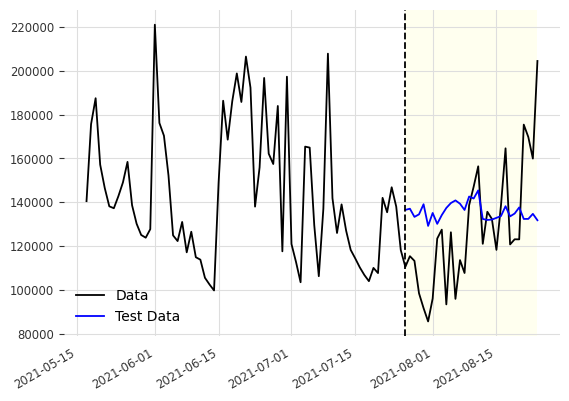

In [5]:
# use best model to predict next 30 steps data point
# You can use `model_name` to specify the pre-trained model in the pipeline when using Python.
prediction = pipeline.predict(n, model_name=None)  

plot_data_period(init_data.iloc[-100:, :], prediction, 
                 time_col='date', target_col='ta')

# Make predictions from the last timestamp of the specific sequence  

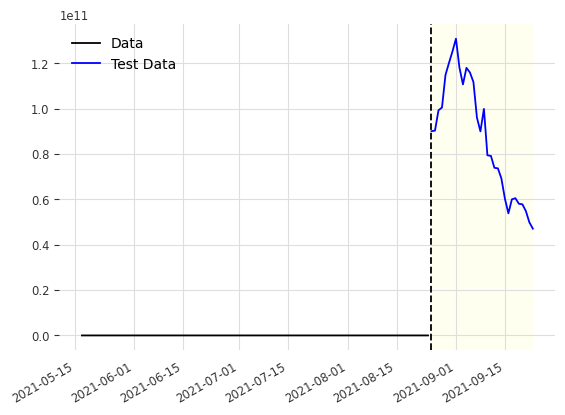

In [7]:
# use best model to predict next 30 steps data point
# You can use `model_name` to specify the pre-trained model in the pipeline when using Python.
prediction = pipeline.predict(n, data=valid_data.iloc[-20:, :])  

plot_data_period(init_data.iloc[-100:, :], prediction, 
                 time_col='date', target_col='ta')

# ModelPipeline saving and loading

In [ ]:
from PipelineTS.io import load_model, save_model

# save
save_model(path='pipeline.zip', model=pipeline)
# load
pipeline = load_model('pipeline.zip')

In [ ]:
prediction = pipeline.predict(n, data=valid_data.iloc[-20:, :])  

plot_data_period(init_data.iloc[-100:, :], prediction, 
                 time_col='date', target_col='ta')